In [2]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import sys
from matplotlib import pyplot as plt
from functools import reduce
import os
import altair as alt

sys.path.append("../src/")
from features.graph_embed import GraphEmbed
from models.cluster_graphs import ClusterGraphs
from visualization.visualize import Visualize
print("import done")

import done


In [3]:
cluster_f_name = 'pheme_graphs_clustered.pkl'
raw_data = pd.read_csv('../data/raw/pheme/pheme_all_events.csv')

clusters = pd.read_pickle(os.path.join("..", "models", cluster_f_name))
graphs = GraphEmbed.read_graphs(clusters)
viz = Visualize(clusters, graphs)

<ipython-input-3-319f18d333e0>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('../data/raw/pheme/pheme_all_events.csv')


# Overview

Data: Each network is a combination of all rumour threads relating to a specific rumour. All pheme rumours are included

In [21]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_features = clusters.select_dtypes(numerics)
numeric_features.columns

Index(['id', 'mean_tweet_len', 'mean_user_mentions', 'urls_mean',
       'media_count_mean', 'hashtags_count_mean', 'retweet_count_mean',
       'favorite_count_mean', 'mentions_count_mean', 'user_tweet_count_mean',
       'user_follower_count_mean', 'user_friends_count_mean', 'sentiment_mean',
       'num_threads', 'num_nodes', 'num_edges', 'num_wcc', 'largest_wcc',
       'diameter_largest_wcc', 'max_out_degree', 'max_in_degree',
       'mean_out_degree', 'mean_in_degree', 'wiener_index', 'label'],
      dtype='object')

## Clustering stats

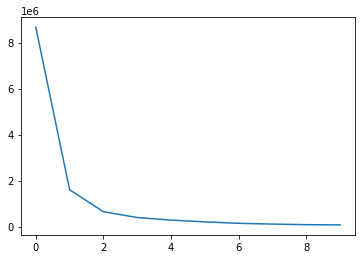

In [4]:
cl = ClusterGraphs(clusters)
num_clusters, inertias = cl.choose_clust_num_k_means()
plt.plot(inertias)

In [5]:
num_clusters

3

In [6]:
len(clusters)

235

## Descriptive Stats

In [23]:
clusters.loc[:, ['num_threads', 'num_nodes', 'num_edges', 'num_wcc', 'largest_wcc',
       'diameter_largest_wcc', 'max_out_degree', 'max_in_degree',
       'mean_out_degree', 'mean_in_degree', 'wiener_index']].describe()

,num_threads,num_nodes,num_edges,num_wcc,largest_wcc,diameter_largest_wcc,max_out_degree,max_in_degree,mean_out_degree,mean_in_degree,wiener_index
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.0,235.000000,235.000000,235.000000
mean,10.140426,140.272340,129.523404,10.748936,0.493167,10.038298,14.400000,1.0,0.909880,0.909880,38.054383
std,16.041128,228.795121,213.691352,16.429620,0.325574,8.291860,6.108142,0.0,0.051563,0.051563,81.338879
min,1.000000,5.000000,4.000000,1.000000,0.034204,2.000000,2.000000,1.0,0.625000,0.625000,0.898129
25%,2.000000,27.000000,24.500000,2.000000,0.203203,4.000000,10.000000,1.0,0.896836,0.896836,5.766234
50%,4.000000,60.000000,57.000000,4.000000,0.420000,7.000000,15.000000,1.0,0.923077,0.923077,13.309091
75%,12.000000,164.000000,147.000000,12.000000,0.747062,13.000000,18.000000,1.0,0.941176,0.941176,30.802049
max,131.000000,2243.000000,2102.000000,141.000000,1.000000,54.000000,38.000000,1.0,0.988636,0.988636,784.266332


In [25]:
clusters.event.value_counts()

sydneysiege          60
charliehebdo         59
ottawashooting       49
ferguson             36
germanwings-crash    18
prince-toronto        6
putinmissing          5
ebola-essien          1
gurlitt               1
Name: event, dtype: int64